In [ ]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/average-monthly-surface-temperature.csv")

In [3]:
pais = ["Libya"]
df_filtrado = df[df["Entity"].isin(pais)]

In [4]:
# Verificando se está pegando o pais de escolha
print(df_filtrado.head())

       Entity Code  year         Day  Average surface temperature daily  \
108120  Libya  LBY  1940  1940-01-15                          10.622398   
108121  Libya  LBY  1940  1940-02-15                          12.738207   
108122  Libya  LBY  1940  1940-03-15                          15.594740   
108123  Libya  LBY  1940  1940-04-15                          19.981180   
108124  Libya  LBY  1940  1940-05-15                          26.367147   

        Average surface temperature monthly  
108120                            20.251947  
108121                            20.251947  
108122                            20.251947  
108123                            20.251947  
108124                            20.251947  


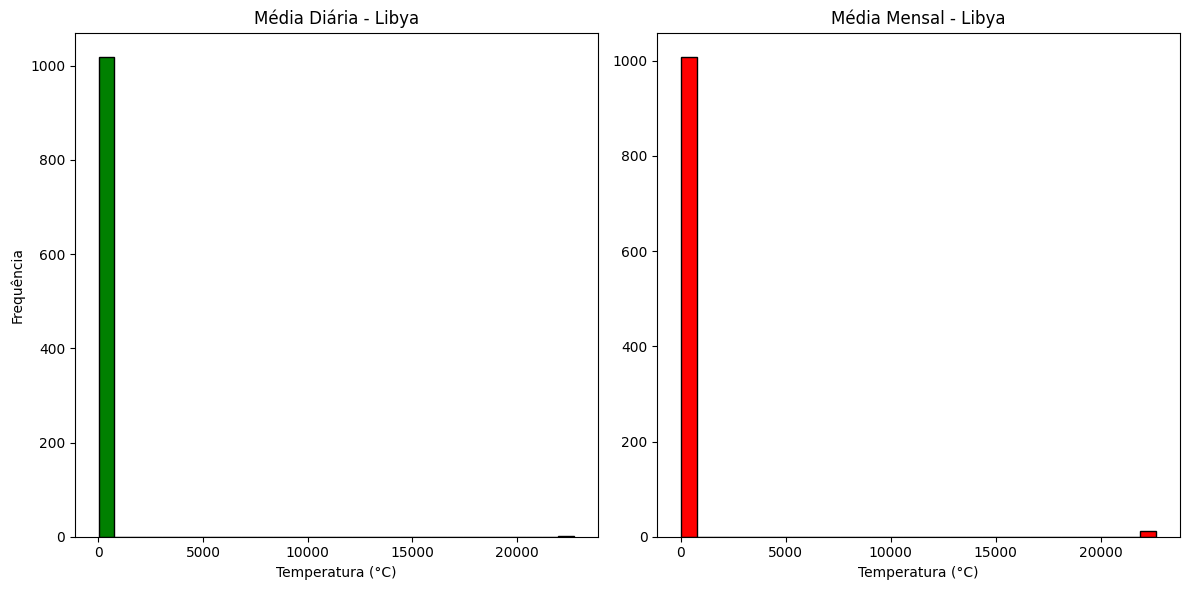

In [5]:
# Importar método de gerar histograma
from Funcoes import gerar_histogramas

# Gerar histograma do pais selecionado "Contém outliers"
gerar_histogramas("Libya", df_filtrado)

In [6]:
# Importar método de identificar outliers
from Funcoes import identificar_outliers

# Função para identificar outliers
outliers_diario = identificar_outliers(df_filtrado['Average surface temperature daily'])
outliers_mensal = identificar_outliers(df_filtrado['Average surface temperature monthly'])

# Printando os outliers
print(f"Outliers diários:\n {outliers_diario}")
print(f"\nOutliers mensais:\n {outliers_mensal}")

Outliers diários:
 108273    22736.0
Name: Average surface temperature daily, dtype: float64

Outliers mensais:
 108960       24.016893
108961       24.016893
108962       24.016893
108963       24.016893
108964       24.016893
108965       24.016893
108966       24.016893
108967       24.016893
108968       24.016893
108969       24.016893
108970       24.016893
108971       24.016893
109068    22648.000000
109069    22648.000000
109070    22648.000000
109071    22648.000000
109072    22648.000000
109073    22648.000000
109074    22648.000000
109075    22648.000000
109076    22648.000000
109077    22648.000000
109078    22648.000000
109079    22648.000000
109128       23.924673
109129       23.924673
109130       23.924673
109131       23.924673
109132       23.924673
109133       23.924673
109134       23.924673
109135       23.924673
109136       23.924673
109137       23.924673
109138       23.924673
109139       23.924673
Name: Average surface temperature monthly, dtype: float64


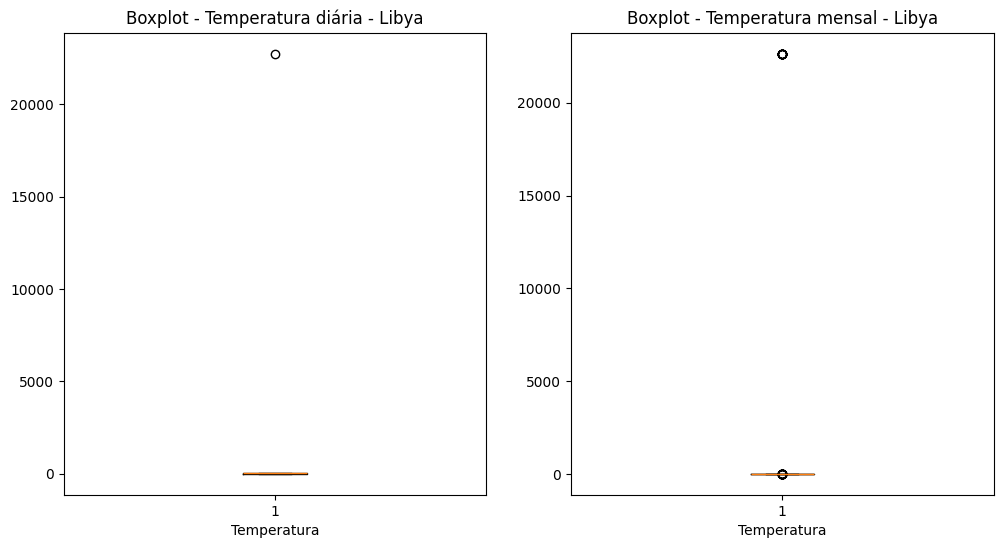

In [10]:
# Importar método de gerar boxplot "Contém outliers"
from Funcoes import gerar_boxplot

gerar_boxplot("Libya", df_filtrado)

In [8]:
# Importar método de remover outliers
from Funcoes import remover_outliers

# Remover outliers
temperatura_diaria_correta = remover_outliers(df_filtrado['Average surface temperature daily'])
temperatura_mensal_correta = remover_outliers(df_filtrado['Average surface temperature monthly'])

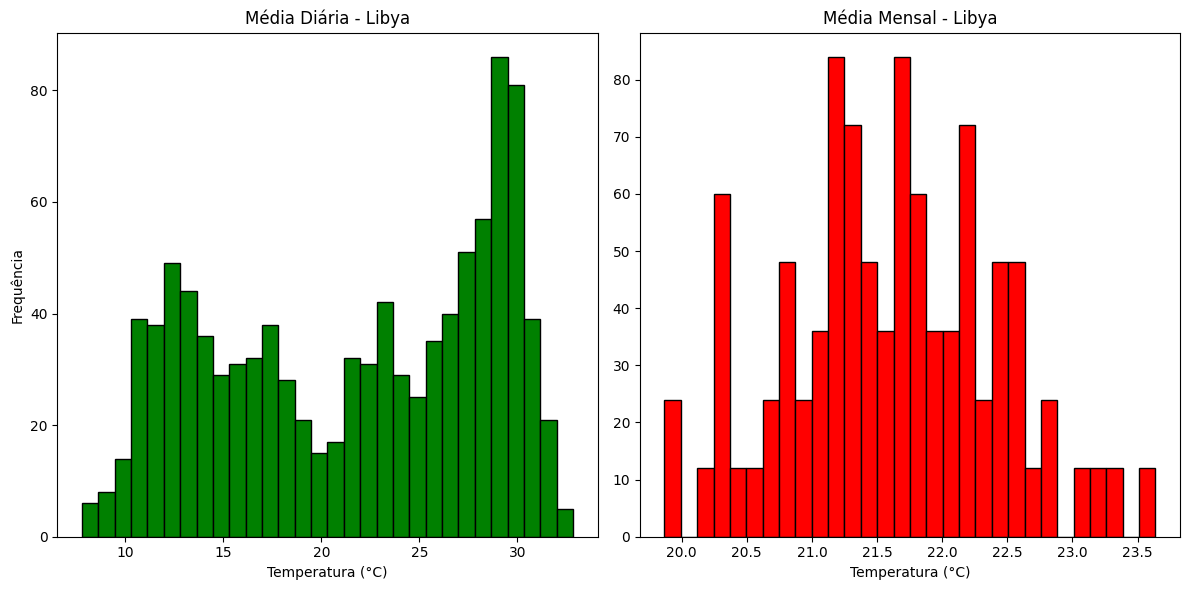

In [9]:
# Criar dataframe com os dados sem outliers
dados_pais_correto = pd.DataFrame({
    'Entity': 'Libya',
    'Average surface temperature daily': temperatura_diaria_correta,
    'Average surface temperature monthly': temperatura_mensal_correta
})

# Gerar histograma do pais selecionado sem outliers
gerar_histogramas('Libya', dados_pais_correto)

In [ ]:
# OBS: Esse pais tem muito outliers. Pode haver inconsistência!!!